In [74]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [38]:
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
import cv2
cv2.__version__

'4.2.0'

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

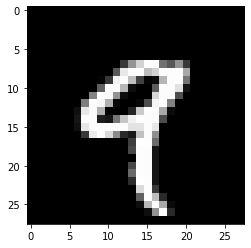

In [6]:
plt.imshow(X_train[4],'gray')

In [7]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [8]:
#check the label and no of image is same
assert(X_train.shape[0] == y_train.shape[0])
assert(X_test.shape[0] == y_test.shape[0])
#to make sure that input is of correct size
assert(X_train.shape[1:] == (28,28))
assert(X_train.shape[1:] == (28,28))

In [9]:
y_train[4]

9

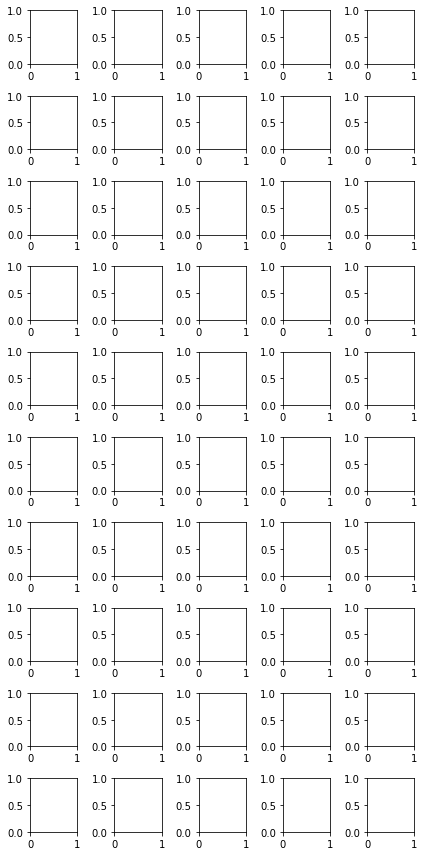

In [10]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes,ncols=cols, figsize=(6,12))
fig.tight_layout()

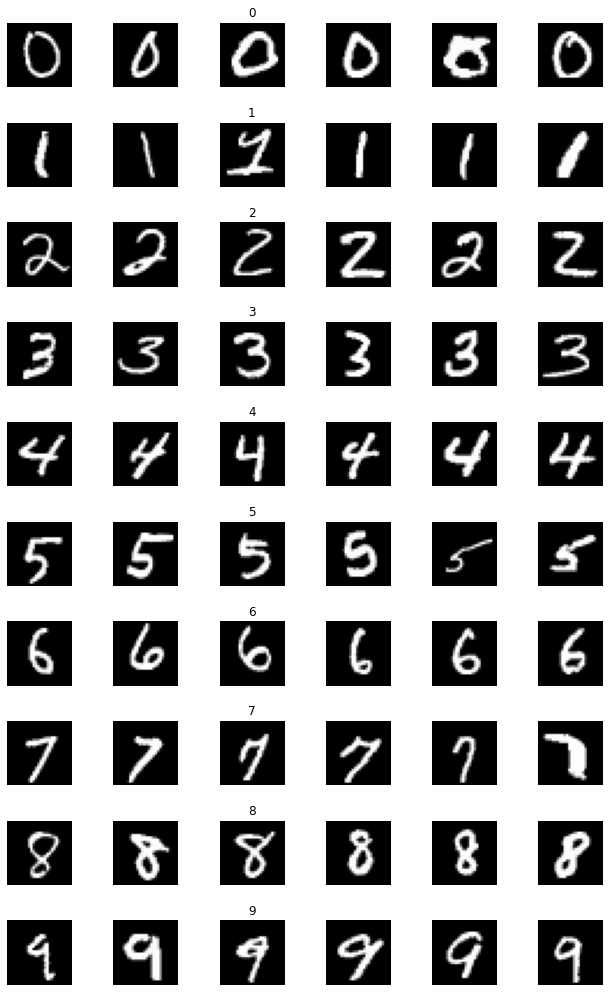

In [12]:
num_of_samples = []

cols = 6
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes,ncols=cols, figsize=(9,14))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)),:,:],'gray')
        axs[j][i].axis("off")
        if i ==2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'NUmber of images')

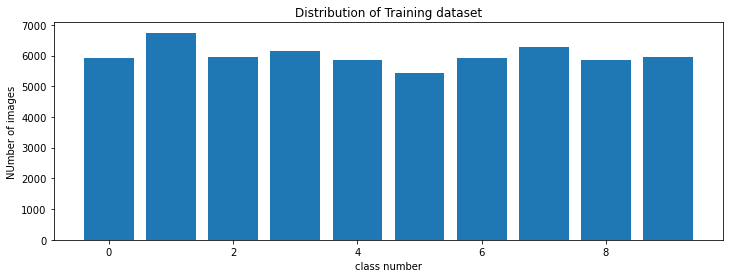

In [13]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of Training dataset")
plt.xlabel("class number")
plt.ylabel("NUmber of images")

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [16]:
y_cat_test.shape

(10000, 10)

In [25]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [19]:
X_train = X_train/255
X_test = X_test/255

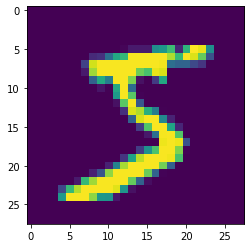

In [24]:
plt.imshow(X_train[0])

In [27]:
num_pixels = X_train.shape[1] * X_train.shape[2]
print(num_pixels)

784


In [29]:
X_train_flat = X_train.reshape(X_train.shape[0],num_pixels)
X_test_flat = X_test.reshape(X_test.shape[0],num_pixels)

print(X_train_flat.shape)

(60000, 784)


In [150]:
def create_model():
    model = Sequential()
    model.add(Dense(50,input_dim=num_pixels,activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(25,activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes,activation = 'softmax'))
    
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [151]:
model = create_model()
print(model.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 50)                39250     
_________________________________________________________________
dropout_28 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 25)                1275      
_________________________________________________________________
dropout_29 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 10)                260       
Total params: 40,785
Trainable params: 40,785
Non-trainable params: 0
_________________________________________________________________
None


In [152]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [153]:
model.fit(X_train_flat,y_cat_train,validation_split=0.2,epochs=50,
          verbose=1,callbacks=[early_stop])

Epoch 1/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.8659 - accuracy: 0.7181 - val_loss: 0.2857 - val_accuracy: 0.9197
Epoch 2/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5327 - accuracy: 0.8405 - val_loss: 0.2293 - val_accuracy: 0.9348
Epoch 3/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4748 - accuracy: 0.8583 - val_loss: 0.2118 - val_accuracy: 0.9415
Epoch 4/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4424 - accuracy: 0.8681 - val_loss: 0.2004 - val_accuracy: 0.9433
Epoch 5/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4166 - accuracy: 0.8784 - val_loss: 0.1931 - val_accuracy: 0.9459
Epoch 6/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4052 - accuracy: 0.8792 - val_loss: 0.1853 - val_accuracy: 0.9480
Epoch 7/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3923 - accuracy: 0.8834 - val_loss: 0.1779 - val_accuracy:

In [154]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.865917,0.718083,0.285741,0.919750
1,0.532697,0.840458,0.229287,0.934750
2,0.474788,0.858271,0.211838,0.941500
3,0.442352,0.868104,0.200351,0.943250
4,0.416643,0.878438,0.193096,0.945917
5,0.405169,0.879167,0.185349,0.948000
6,0.392322,0.883396,0.177880,0.951417
7,0.373772,0.889792,0.182960,0.950917


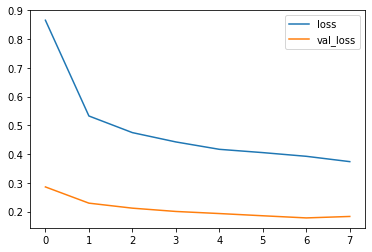

In [155]:
losses[['loss','val_loss']].plot()

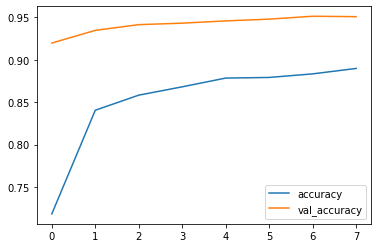

In [156]:
losses[['accuracy','val_accuracy']].plot()

In [157]:
score = model.evaluate(X_test_flat,y_cat_test)
print(type(score))
print(score)

313/313 [==============================] - 0s 806us/step - loss: 0.1876 - accuracy: 0.9484
<class 'list'>
[0.18755687773227692, 0.9484000205993652]


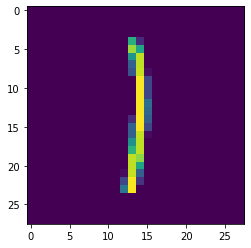

In [158]:
pred_img = X_test[40]
pred_img = pred_img/255
plt.imshow(pred_img)

In [159]:
pred_flat = pred_img.reshape(1,784)

In [160]:
prediction = model.predict_classes(pred_flat)
print(prediction)

[5]
